# Example Video Scan along a predefined trajectory

This notebook demonstrates the video_scan module of hyvis using a toy function and a predefined path in its landscape. In practice you would have some (likely more expensive) cost function and trajectory in the landscape that arose from multiple iterations of classical training.

It works in the following way: For each point in the trajectory a 2D-scan will be performed to make up a frame of the video. The directions of that scan are the two most significant principal components of the orthogonal projection of the remaining trajectory onto the orthogonal complement of the gradient at that point of the previous point. In other words, it scans the directions that show the most of the remaining trajectory but without considering the direction of the next point as that is where you will go in the next frame anyways.

In [1]:
import numpy as np
from hyvis.video_scans import trajectory_scan_stepwise_pca, trajectory_scan_stepwise_hessian

In [2]:
def testfunc(
    arg: np.ndarray
) -> float:
    return np.prod(np.cos(arg))

Here we define the trajectory. It is just a path in the landscape with some multidimensional curvature given by sin and cos.

Importantly, resolution defines the resolution of each frame and step_num defines the length of the trajectory and thus the number of frames. These are the most significant parameters for performance.

In [3]:
first = 2*np.pi*np.array([0, 0, 0, 0])
last = 2*np.pi*np.array([1, 1, 0, 0])
shift1 = 1*np.array([0, 1, 1, 0])
shift2 = 1*np.array([1, 0, 0, 1])

resolution = 50
step_num = 100
step_space = np.linspace(0,1,step_num)

trajectory = np.zeros([step_num,4])
for step_id in range(step_num):
    ratio = step_space[step_id]
    trajectory[step_id,:] = (first*(1-ratio) + last*ratio + 
                             np.sin(2*np.pi*ratio)*shift1 +
                             np.sin(np.pi*ratio)*shift2)

Now performing the scan:

In [4]:
scan1 = trajectory_scan_stepwise_pca(func=testfunc,trajectory=trajectory,resolution=resolution)

And finally, looking at it with the animate method. This can take some time. The center of the frame is the current point and the red line shows the remaining trajectory with some fade towards the end. Note that this is a completely arbirary trajectory through this landscape.

The first and the last frame are just scans according to the full PCA, because the other method cannot be apllied at endpoints.

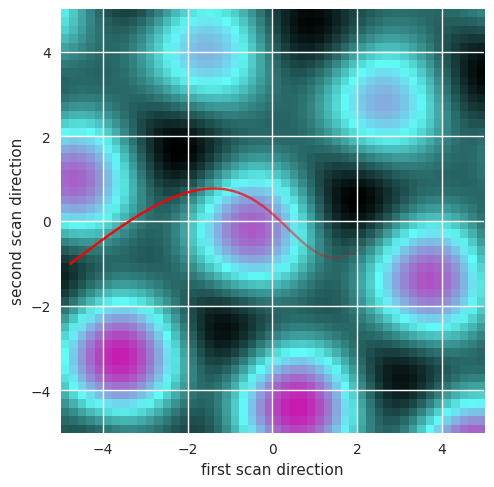

In [5]:
scan1.animate(show_trajectory=True,trajectory_fade=True)

You can try this with any costfunction that maps a vector of real numbers to a real number,
but be warned that especially with the videos your function will be called many times.